# Notebook com analise voltada a sars-cov2

#### Arquivos que devem ser importados para fazer analises

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#### Conexão com o BD

In [2]:
con = sqlite3.connect("../data/propriedades.db")

#### Query para carregar os dados

In [3]:
dataframe = pd.read_sql("select * from dados", con)

#### Comando para mostrar o BD

In [4]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL287510,357.454,1.5119,73.83,10.0,NaN,8.79,1.80,0.40,BASE,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1
1,CHEMBL285301,320.433,1.7124,70.59,9.0,NaN,8.79,1.96,0.55,BASE,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1
2,CHEMBL285413,255.314,1.4123,48.95,8.0,NaN,7.42,1.45,1.14,NEUTRAL,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,COc1ccc(OC)c(CNCC(OC)OC)c1
3,CHEMBL24475,262.349,3.6489,46.53,8.0,9.95,NaN,4.40,4.40,NEUTRAL,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1
4,CHEMBL24545,330.468,4.4500,43.37,2.0,NaN,NaN,4.21,4.21,NEUTRAL,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084583,CHEMBL4110107,507.538,4.4727,105.57,8.0,11.72,3.32,3.13,3.13,NEUTRAL,507.54,4.0,35.0,0.47,507.1552,7.0,2.0,1.0,Cc1cc(N=S2(=O)CCC2)cc2ncnc(Nc3ccc(F)cc3O[C@H](...
2084584,CHEMBL4110108,337.335,3.0320,76.68,2.0,11.84,5.74,2.11,2.10,NEUTRAL,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1
2084585,CHEMBL4110109,338.785,4.1153,41.99,7.0,NaN,7.09,3.66,3.49,NEUTRAL,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F
2084586,CHEMBL4110110,480.968,3.1266,96.81,10.0,NaN,3.97,3.19,3.19,NEUTRAL,480.97,3.0,33.0,0.54,480.1940,7.0,2.0,0.0,CC(C(=O)NCCF)c1ccc(O[C@@H]2CCN(c3ncnc(OCC(C)(C...


#### Biblioteca com descritores em python e outros modulos

In [5]:
from rdkit import Chem

In [6]:
smiles = '[H]/N=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H]2[C@@H]3[C@@H](C3(C)C)CN2C(=O)[C@H](C(C)(C)C)NC(=O)C(F)(F)F'

In [7]:
pf = Chem.MolFromSmiles(smiles)

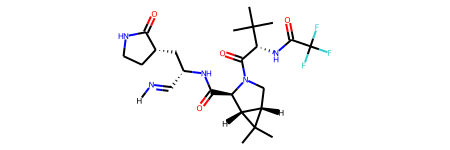

In [8]:
pf

In [9]:
pf_finger = Chem.RDKFingerprint(pf)

#### Busca no BD da molecula 'smiles' a cima

In [10]:
dataframe.query("canonical_smiles == @smiles")

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles


#### Importando modulos desenvolvidos no laboratorio

In [11]:
import sys
sys.path.append("../module/")
import calcula_tanimoto

#### Calculando indices de tanimoto

In [14]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL287510,357.454,1.5119,73.83,10.0,NaN,8.79,1.80,0.40,BASE,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1
1,CHEMBL285301,320.433,1.7124,70.59,9.0,NaN,8.79,1.96,0.55,BASE,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1
2,CHEMBL285413,255.314,1.4123,48.95,8.0,NaN,7.42,1.45,1.14,NEUTRAL,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,COc1ccc(OC)c(CNCC(OC)OC)c1
3,CHEMBL24475,262.349,3.6489,46.53,8.0,9.95,NaN,4.40,4.40,NEUTRAL,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1
4,CHEMBL24545,330.468,4.4500,43.37,2.0,NaN,NaN,4.21,4.21,NEUTRAL,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084583,CHEMBL4110107,507.538,4.4727,105.57,8.0,11.72,3.32,3.13,3.13,NEUTRAL,507.54,4.0,35.0,0.47,507.1552,7.0,2.0,1.0,Cc1cc(N=S2(=O)CCC2)cc2ncnc(Nc3ccc(F)cc3O[C@H](...
2084584,CHEMBL4110108,337.335,3.0320,76.68,2.0,11.84,5.74,2.11,2.10,NEUTRAL,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1
2084585,CHEMBL4110109,338.785,4.1153,41.99,7.0,NaN,7.09,3.66,3.49,NEUTRAL,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F
2084586,CHEMBL4110110,480.968,3.1266,96.81,10.0,NaN,3.97,3.19,3.19,NEUTRAL,480.97,3.0,33.0,0.54,480.1940,7.0,2.0,0.0,CC(C(=O)NCCF)c1ccc(O[C@@H]2CCN(c3ncnc(OCC(C)(C...


In [17]:
%%time
data_com_tanimoto = calcula_tanimoto.calcula_tanimoto(smiles, dataframe, 22)

RDKit WARNING: [17:04:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:04:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:04:28] WARNING: not removing hydrogen atom without neighbors
[17:04:28] WARNING: not removing hydrogen atom without neighbors
[17:04:28] WARNING: not removing hydrogen atom without neighbors
[17:04:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:04:29] WARNING: not removing hydrogen atom without neighbors
[17:04:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:05:18] WARNING: not removing hydrogen atom without neighbors
[17:05:18] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:06:54] WARNING: not removing hydrogen atom without neighbors
[17:06:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:07:51] WARNING: not removing hydrogen atom without neighbors
[17:07:51] WARNING: not removing hydrogen atom wit

Error: Cc1ccc2c(c1)-n1-c(=O)/c=c\c(=O)-n-2-c2cc(C)ccc2-1



[17:08:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 10 11 15 16 17 19 20 21



CPU times: user 1min 10s, sys: 12.3 s, total: 1min 23s
Wall time: 6min 45s


#### Ordenando os pelo maior

In [18]:
data_com_tanimoto.sort_values(by='i_tanimoto',ascending=False)

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles,i_tanimoto
45537,CHEMBL3542331,366.5060,1.4671,104.53,3.0,NaN,NaN,0.79,0.79,NEUTRAL,366.51,2.0,26.0,0.70,366.2631,3.0,3.0,0.0,CC(C)(C)NC(=O)N[C@H](C(=O)N1C[C@H]2[C@@H]([C@H...,0.73
23906,CHEMBL388373,561.7240,0.8904,167.77,11.0,11.98,NaN,1.18,1.18,NEUTRAL,561.72,3.0,40.0,0.27,561.3526,6.0,4.0,1.0,CC(=O)N[C@H](C(=O)NC(C(=O)N1C[C@H]2[C@@H](C1C(...,0.73
299,CHEMBL593198,686.8170,2.7749,157.02,13.0,12.30,NaN,3.47,3.47,NEUTRAL,686.82,2.0,48.0,0.17,686.3979,6.0,4.0,1.0,C=CCNC(=O)C(=O)C(CCC)NC(=O)[C@@H]1[C@@H]2[C@H]...,0.71
23907,CHEMBL388372,573.7350,1.0345,167.77,12.0,11.98,NaN,1.23,1.23,NEUTRAL,573.74,4.0,41.0,0.25,573.3526,6.0,4.0,1.0,CC(=O)N[C@H](C(=O)NC(C(=O)N1C[C@H]2[C@@H](C1C(...,0.71
89133,CHEMBL443386,575.7510,1.7723,167.77,12.0,12.48,NaN,2.78,2.78,NEUTRAL,575.75,3.0,41.0,0.26,575.3683,6.0,4.0,1.0,CC(C)C(=O)[C@@H](NC(=O)N[C@H](C(=O)N1C[C@H]2[C...,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40587,CHEMBL43280,31.0580,-0.4251,26.02,0.0,NaN,10.08,-0.63,-3.15,BASE,31.06,0.0,2.0,0.38,31.0422,1.0,1.0,0.0,CN,0.00
52855,CHEMBL1187,97.9940,-0.9286,77.76,0.0,1.80,NaN,-1.02,-3.97,ACID,97.99,0.0,5.0,0.34,97.9769,1.0,3.0,0.0,O=P(O)(O)O,0.00
86782,CHEMBL1909275,19.0089,0.1525,0.00,0.0,3.17,NaN,0.15,0.37,ACID,19.01,0.0,1.0,0.35,20.0062,0.0,0.0,0.0,[18FH],0.00
42569,CHEMBL1060,141.9580,-8.1846,83.42,0.0,NaN,NaN,NaN,NaN,None,141.96,0.0,7.0,0.27,141.9408,3.0,1.0,0.0,O=P([O-])([O-])O.[Na+].[Na+],0.00


In [ ]:
con_2 = sqlite3.connect("ligantes_clauber.db")

In [ ]:
ligantes = pd.read_sql("select * from ligantes_clauber", con_2)

In [ ]:
ligantes

In [ ]:
%%time
ligantes_com_tanimoto = calcula_tanimoto(smiles, ligantes, 20)

In [ ]:
ligantes_com_tanimoto

# ligantes_com_tanimoto.sort_values(by='i_tanimoto')